# Deep Learning: Assignment 1
Patricia Maya

### 1. Backpropagation (0.5pt)

- Draw the computation graph for the following function: $f(a,b,c,d,e) = \frac{1}{(1+(a^b + c^d)*e)^2}$. Compute the gradient of the function with respect it to its inputs at $(a,b,c,d,e) = (1,1,1,1,1)$.

### 2. Gradient Descent (2pt)

 - Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays (see python module `numpy`).


In [4]:
import math, numpy
y_labels = numpy.array([2,3,1,4])
y_predicted = numpy.array([1.5,2.4,1,2])

def mse(y_obs, y_pred):
      lenght = len(y_obs)
      sqrs = numpy.square(y_obs-y_pred)
      sum_sqrs = numpy.sum(sqrs)
      return (sum_sqrs/lenght)

mse(y_labels, y_predicted)

1.1525

 - Consider a model: $y = mx + c$, where the model parameter $m = 1$ and parameter $c = 0$ and $x \in (0,1)$. Plot the function using matplotlib.


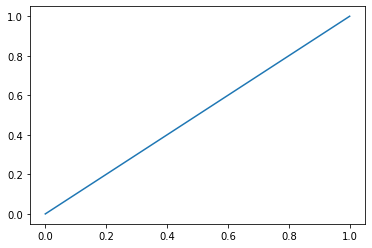

In [5]:
import matplotlib.pyplot as plt

m=1
c=0 
x= numpy.array([0,1])
y = m*x + c
plt.plot(x,y)



 - Generate example data by drawing $N = 100$ uniform values from the range in which $x$ lies, and compute the corresponding $y$ to get $\{x_i,y_i\}_{i=1}^{N}$.
 
 

In [6]:
# 1/100 = .01
x = numpy.arange(0, 1, .01) #Returns evenly spaced values within a given interval. (0,1)
y = m * x + c
y

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

- Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the model parameters (choose an appropriate learning rate). The loss function will be the mean squared error.
 

In [7]:
mses = []
numpy.random.seed(11)
# Initialize parameters randomly
m = numpy.random.randn()
c = numpy.random.randn()

# Batch size == number of examples for simplicity
N = x.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.1 #Also called learning rate

#Gradient descent loop
for i in range(210):
  
    # Evaluate class scores
    y_pred = numpy.dot(x, m) + c
  
    # Compute the loss with mse
    loss = mse(y , y_pred)
    mses.append(loss)
    if i % 10 == 0:
        print("iteration {0}: loss {1}".format(i, loss))

#mse = (y-y_pred)^2 / N
#gradients:
#dmse / dpred = 2 / (N* sum(y - y_pred))
#derror / dpred = -1
#dpred / dm = x
#dpred / dc = 1

    dm = -(2/N)*numpy.dot(y - y_pred, x)
    dc = -(2/N)*numpy.sum(y - y_pred)
  
    # Perform parameter update of m & c
    m += -step_size * dm
    c += -step_size * dc

#Parameters found are: 
print("Final loss (MSE): {0} , where m: {0} and c:{1}".format(loss, m, c))

iteration 0: loss 0.054011402404437275
iteration 10: loss 0.03211161223693041
iteration 20: loss 0.02458913867971873
iteration 30: loss 0.01884992721267147
iteration 40: loss 0.014450335111639583
iteration 50: loss 0.011077612448229652
iteration 60: loss 0.008492086627271052
iteration 70: loss 0.006510025117968365
iteration 80: loss 0.004990578746627568
iteration 90: loss 0.003825772677519771
iteration 100: loss 0.002932833509529843
iteration 110: loss 0.0022483072361208487
iteration 120: loss 0.0017235500793237038
iteration 130: loss 0.0013212717675819812
iteration 140: loss 0.0010128856160038148
iteration 150: loss 0.0007764771005324403
iteration 160: loss 0.0005952465689363608
iteration 170: loss 0.00045631542461142816
iteration 180: loss 0.0003498109482770808
iteration 190: loss 0.00026816472320371815
iteration 200: loss 0.0002055748086934258
Final loss (MSE): 0.00016183830395418632 , where m: 0.00016183830395418632 and c:1.0431733024594703


- Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot. 
 

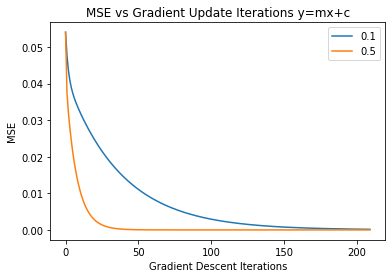

In [8]:
#graph when learning rate= 0.1
plt.title('MSE vs Gradient Update Iterations Analysis')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
plt.plot(range(210), mses,  label=step_size)
plt.legend()

#### **** CHANGING THE LEARNING RATE
mses1= []
numpy.random.seed(11)
m1 = numpy.random.randn()
c1 = numpy.random.randn()
N1 = x.shape[0]
step_size1 = 0.5 #learning rate
for i in range(210):
    y_pred = numpy.dot(x, m1) + c1
    loss = mse(y , y_pred)
    mses1.append(loss)
    dm1 = -(2/N)*numpy.dot(y - y_pred, x)
    dc1 = -(2/N)*numpy.sum(y - y_pred)
    m1 += -step_size1 * dm1
    c1 += -step_size1 * dc1

#graph when learning rate= 0.5
plt.title('MSE vs Gradient Update Iterations y=mx+c')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
#ax.plot(xvals, mses, label=step_size)
#ax.plot(xvals, mses1, label=step_size1)
plt.plot(range(210),mses1,  label=step_size1)
plt.legend()
plt.show()

- Do steps 3-5 when the model is $y = m_1x + m_2x^2 + c$ and the true parameters are $m_1 = 0.5$, $m_2 = 1$ and $c = 1$. And $x \in (0,1)$. **Also, plot the ground truth function.** Compare and contrast the plot with the previous one.
 

Final loss(MSE) w/ LR= 0.1: 0.0035535009569946153 , where m1: 1.31562763213156 , m2: 0.46216544726773146and c:0.8535902792122042
Final loss(MSE) w/ LR= 0.5: 0.0013216074604407478 , where m1: 0.9954703491338673 , m2: 0.7212719336785377and c:0.9119986523036191


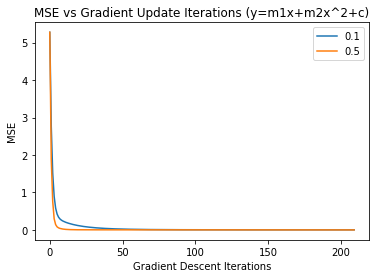

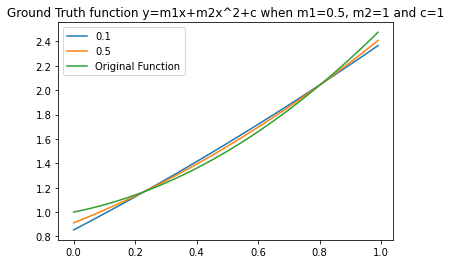

In [9]:
#f(m,x,c)=m1*x+m2*x^2+c
m1 = 0.5
m2 = 1
c = 1 
x= numpy.arange(0, 1, .01) #Returns evenly spaced values within a given interval. (0,1)
y = m1*x+m2*x**2+c
#plt.plot(x,y, label="m1x+m2x^2+c")
#plt.legend()

mses2 = []
numpy.random.seed(10)
# Initialize parameters randomly
m1 = numpy.random.randn()
m2 = numpy.random.randn()
c = numpy.random.randn()

# Batch size == number of examples for simplicity
N = x.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 0.1 #Also called learning rate

#Gradient descent loop
for i in range(210):
  
    # Evaluate class scores
    y_pred = numpy.dot(x, m1) + (numpy.dot(x, m2)**2) + c 
    # Compute the loss with mse
    loss = mse(y , y_pred)
    mses2.append(loss)

#mse = (y-y_pred)^2 / N
#gradients: 
#dmse / dpred = 2 / (N* sum(y - y_pred))
#derror / dpred = -1
#dpred / dm1 = x
#dpred / dm2 = x^2
#dpred / dc = 1

    dm1 = -(2/N)*numpy.dot(y - y_pred, x)
    dm2 = -(2/N)*numpy.dot(y - y_pred, x**2)
    dc =  -(2/N)*numpy.sum(y - y_pred)
  
    # Perform parameter update of m1, m2 & c
    m1 += -step_size * dm1
    m2 += -step_size * dm2
    c += -step_size * dc
#Parameters found are: 
print("Final loss(MSE) w/ LR= 0.1: {0} , where m1: {1} , m2: {2}and c:{3}".format(loss, m1,m2, c))


### --------- CHANGING THE LEARNING RATE ------
mses3 = []
numpy.random.seed(10)
m1_1 = numpy.random.randn()
m2_1 = numpy.random.randn()
c_1 = numpy.random.randn()
N_1 = x.shape[0]
step_size_1 = 0.5 #learning rate
#Gradient descent loop
for i in range(210):
    y_pred = numpy.dot(x, m1_1) + (numpy.dot(x, m2_1)**2) + c_1     #y_pred = m1*x+m2*x**2+c
    loss = mse(y , y_pred)
    mses3.append(loss)
    dm1_1 = -(2/N_1)*numpy.dot(y - y_pred, x)
    dm2_1 = -(2/N_1)*numpy.dot(y - y_pred, x**2)
    dc_1 =  -(2/N_1)*numpy.sum(y - y_pred)
  
    # Perform parameter update of m1, m2 & c
    m1_1 += -step_size_1 * dm1_1
    m2_1 += -step_size_1 * dm2_1
    c_1 += -step_size_1 * dc_1
#Parameters found are: 
print("Final loss(MSE) w/ LR= 0.5: {0} , where m1: {1} , m2: {2}and c:{3}".format(loss, m1_1,m2_1, c_1))

### --------------- PLOTTING RESULTS ----------------------

#graph when learning rate= 0.1
plt.title('MSE vs Gradient Update Iterations Analysis ')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
plt.plot(range(210), mses2,  label=step_size)
plt.legend() 
#graph when learning rate= 0.5
plt.title('MSE vs Gradient Update Iterations (y=m1x+m2x^2+c)')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
plt.plot(range(210), mses3,  label=step_size_1)
plt.legend()
plt.show()

plt.title('Ground Truth function y=m1x+m2x^2+c when m1=0.5, m2=1 and c=1')
y_new= numpy.dot(x, m1) + (numpy.dot(x, m2)**2) + c
plt.plot(x, y_new, label=step_size)
plt.legend()
plt.title('Ground Truth function y=m1x+m2x^2+c when m1=0.5, m2=1 and c=1')
y_new= numpy.dot(x, m1_1) + (numpy.dot(x, m2_1)**2) + c_1
plt.plot(x, y_new, label=step_size_1)
plt.legend()
plt.title('Ground Truth function y=m1x+m2x^2+c when m1=0.5, m2=1 and c=1')
y_new= numpy.dot(x, 0.5) + (numpy.dot(x, 1)**2) + 1
plt.plot(x, y_new, label='Original Function')
plt.legend()
plt.show()

From these figures we can see that as we increase the learning rate, the overall mean squared error decreases faster. Also, the function gotten from using a higher learning rates seems to approximate the ground truth function better.

- Do steps 3-5 when the model is $y = \tanh(m*x + c)$ and the true parameters are $m = 1$ and $c = 2$. And $x \in (0,2)$. Also, **plot the ground truth function.**

Final loss(MSE) w/ LR= 0.1: 0.0024786677315178332 , where m: 1.9878397227866007 and c: 1.1604411747410237
Final loss(MSE) w/ LR= 0.5: 0.006156801101814571 , where m: 1.9623546191616492 and c: 0.9700240332395756


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119909 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 119888 missing from current font.
  font.se

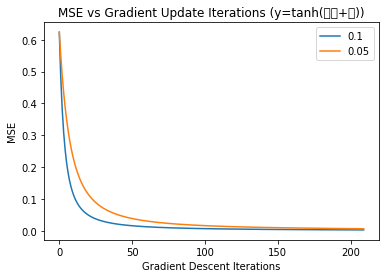

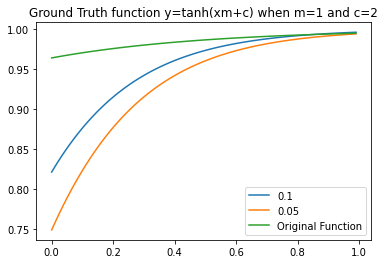

In [10]:
# y=tanh(𝑚𝑥+𝑐)
m = 1
c = 2
x = numpy.arange(0,1.,.01)
y = numpy.tanh(1*x + 2)
#plt.plot(x,y)

mses_tanh = []
numpy.random.seed(7)
# Initialize parameters randomly
m = numpy.random.randn()
c = numpy.random.randn()
# Batch size == number of examples for simplicity
N = x.shape[0]
#Initial value for the Gradient Descent Parameter
step_size = 0.1 #learning rate
#Gradient descent loop
for i in range(210):
    # Evaluate class scores
    y_pred = numpy.tanh(numpy.dot(x, m) + c)
    # Compute the loss with mse
    loss = mse(y , y_pred)
    mses_tanh.append(loss)
#mse = (y-y_pred)^2 / N
#gradients: 
#dmse / dpred = 2 / (N* sum(y - y_pred))    ,             dtanh = 1- np.square(np.add(np.multiply(x,m),c))
#derror / dpred = -1   
#dpred / dm = x*sech^2(mx+c) OR x*(1-(tanh(mx+c))^2)   -------  np.multiply(X.T,(1- np.square(np.tanh(np.add(np.multiply(x,m),c)))
#dpred / dc = sech^2(mx+c) OR 1-(tanh(mx+c))^2 ------- 1- np.square(np.add(np.multiply(x,m),c))
    dm = -(2/N_1)*numpy.dot(y - y_pred, numpy.multiply(x.T, 1 - numpy.square(numpy.tanh(numpy.add(numpy.multiply(x,m),c)))))
    dc = -(2/N_1)*numpy.dot(y - y_pred, 1 - numpy.square(numpy.tanh(numpy.add(numpy.multiply(x,m),c))))
    # Perform parameter update of m1, m2 & c
    m += -step_size * dm
    c += -step_size * dc
#Parameters found are: 
print("Final loss(MSE) w/ LR= 0.1: {0} , where m: {1} and c: {2}".format(loss, m, c))
#graph when learning rate= 0.1
plt.title('MSE vs Gradient Update Iterations Analysis ')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
plt.plot(range(210), mses_tanh,  label=step_size)
plt.legend()

########## CHANGING THE LEARNING RATE
mses_tanh1 = []
numpy.random.seed(7)
# Initialize parameters randomly
m_1 = numpy.random.randn()
c_1 = numpy.random.randn()
N_1 = x.shape[0]
#Initial value for the Gradient Descent Parameter
step_size1 = 0.05 #learning rate
for i in range(210):
    y_pred = numpy.tanh(numpy.dot(x, m_1) + c_1)
    loss1 = mse(y , y_pred)
    mses_tanh1.append(loss1)
    dm1 = -(2/N_1)*numpy.dot(y - y_pred, numpy.multiply(x.T, 1 - numpy.square(numpy.tanh(numpy.add(numpy.multiply(x,m_1),c_1)))))
    dc1 = -(2/N_1)*numpy.dot(y - y_pred, 1 - numpy.square(numpy.tanh(numpy.add(numpy.multiply(x,m_1),c_1))))
    m_1 += -step_size1 * dm1
    c_1 += -step_size1 * dc1
#Parameters found are: 
print("Final loss(MSE) w/ LR= 0.5: {0} , where m: {1} and c: {2}".format(loss1, m_1, c_1))

#graph when learning rate= 0.1
plt.title('MSE vs Gradient Update Iterations (y=tanh(𝑚𝑥+𝑐))')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
plt.plot(range(210), mses_tanh1,  label=step_size1)
plt.legend()
plt.show()

plt.title('Ground Truth function y=tanh(xm+c) when m=1 and c=2')
plt.plot(x, numpy.tanh(m*x + c), label=step_size)
plt.legend()
plt.title('Ground Truth function y=tanh(xm+c) when m=1 and c=2')
plt.plot(x, numpy.tanh(m_1*x + c_1), label=step_size1)
plt.legend()
plt.title('Ground Truth function y=tanh(xm+c) when m=1 and c=2')
plt.plot(x, numpy.tanh(1*x + 2), label='Original Function')
plt.legend()
plt.show()

### 3. ML Basics (0.5pt)

 - Write a function to compute the ({multiclass}) logistic loss ({also called the cross-entropy loss}) given the parameters $(W,b)$ of a linear model (as \emph{numpy} arrays) and an example $(x,y)$. 


In [11]:
# Cross-entropy loss  = - log q(x)  when x,y are numpy arrays
def cross_entropy_multiclass(x, y, w, b):
  num_examples = x.shape[0]
  #evaluate class scores
  scores = numpy.dot(x, w) + b 
  # compute the class probabilities
  exp_scores = numpy.exp(scores)
  probs = exp_scores / numpy.sum(exp_scores, axis=1, keepdims=True)
  # compute the loss: average cross-entropy loss 
  corect_logprobs = -numpy.log(probs[range(num_examples),y])
  data_loss = numpy.sum(corect_logprobs)/num_examples


 - Add an $\ell_1$ regularization and an $\ell_2$ regularization to the loss function.

In [12]:
# Cross-entropy loss with regularization terms L1 & L2
def cross_entropy_multiclass_REG(x, y, w, b, L1=1e-3, L2=1e-3):
  num_examples = x.shape[0]
  #evaluate class scores
  scores = numpy.dot(x, w) + b 
  # compute the class probabilities
  exp_scores = numpy.exp(scores)
  probs = exp_scores / numpy.sum(exp_scores, axis=1, keepdims=True)
  # compute the loss: average cross-entropy loss 
  corect_logprobs = -numpy.log(probs[range(num_examples),y])
  data_loss = numpy.sum(corect_logprobs)/num_examples
  
  # L1 & L2 regularization terms
  L1_reg = 0.5 * L1 * numpy.sum(numpy.abs(w))     #λ sigma|w|
  L2_reg = 0.5 * L2 * numpy.sum(numpy.square(w))  #λ sigma w^2
  reg_loss = L1_reg + L2_reg
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration {0}: loss {1}".format(i, loss))

### 4. Classification Pipeline (2.5pt)

 -  Generate data from \textit{Data\_Linear\_Classifier.ipynb} (refer to the corresponding lecture).
 

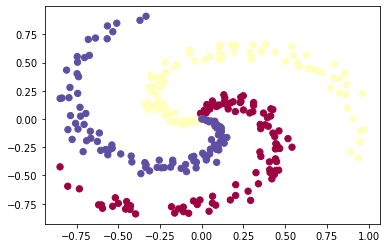

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

pickle.dump(X,open('dataX.pickle','wb'))
pickle.dump(y,open('dataY.pickle','wb'))


#To read data for this experiment
import pickle 
#Read data
X = pickle.load(open('dataX.pickle','rb'))  #'rb' : reading binary
y = pickle.load(open('dataY.pickle','rb')) 

#Define some local varaibles
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

-  Split the data into test and train (20\%:80\%).


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

 -  Build a linear classifier assuming the multiclass logistic loss and an $\ell_2$ regularization for the weights only. Report the prediction accuracy on the training data and the test data and show appropriate plots.
 

Performance - training data:


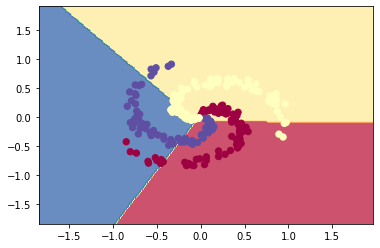

Train Accuracy:
0.5291666666666667
 
 
Performance - test data:


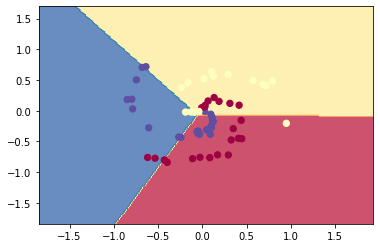

Test Accuracy:
0.5166666666666667


In [19]:
# LINEAR CLASSIFIER w/ multiclass logistic loss & L2 regularization only
# Initializing parameters randomly
L2= 1e-3
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
# Initial values from hyperparameter
reg = 0.1 # regularization strength 

#batch size ==  number of training examples
num_examples = X_train.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

# gradient descent loop
for i in range(200):
    num_examples = X_train.shape[0]
    #evaluate class scores
    scores = np.dot(X_train, W) + b 
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # compute the loss: average cross-entropy loss 
    corect_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(corect_logprobs)/num_examples
    # L2 regularization term
    L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
    reg_loss = L2_reg
    loss = data_loss + reg_loss
    #if i % 10 == 0:
      #print("iteration {0}: loss {1}".format(i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    # regularization gradient
    dW += reg*W 
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

###### EVALUATION OF MODEL
def plot_results(X, y, W, b):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

print('Performance - training data:')
plot_results(X_train, y_train , W , b)
# Train Accuracy
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Train Accuracy:")
print(np.mean(predicted_class == y_train))
print(' ')
print(' ')

# Test Accuracy
scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('Performance - test data:')
plot_results(X_test , y_test , W , b)
print("Test Accuracy:")
print(np.mean(predicted_class == y_test))

-  Introduce a cross validation scheme and justify your choice of parameters. What is the validation accuracy compare to the test accuracy.
 

In [84]:
#USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS
from sklearn.model_selection import KFold
kfold = KFold(4, True, 0)
step_sizes = [.5]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv = [np.mean(acc) for acc in accuracies]
print("accross folds mean accuracy:")
mean_acc_kcv

Step size: 0.5 where W: [[ 0.0960158   0.18215602 -0.27817182]
 [-0.25997571  0.28101329 -0.02103758]] b: [[ 0.03862572  0.12068627 -0.15931198]] , has loss: 1.0045572733791295 & accuracy: 0.5944444444444444
Step size: 0.5 where W: [[ 0.10926696  0.13013313 -0.23940009]
 [-0.20995925  0.27406843 -0.06410917]] b: [[-0.02683056  0.07024566 -0.0434151 ]] , has loss: 1.0293679206657427 & accuracy: 0.5777777777777777
Step size: 0.5 where W: [[ 0.13821022  0.12977394 -0.26798417]
 [-0.26002259  0.27828069 -0.0182581 ]] b: [[ 0.06268461  0.03985582 -0.10254043]] , has loss: 1.0132705252266276 & accuracy: 0.5777777777777777
Step size: 0.5 where W: [[ 0.14826486  0.12459554 -0.2728604 ]
 [-0.19759546  0.25525758 -0.05766212]] b: [[-0.16746048  0.00306965  0.16439082]] , has loss: 1.0169186670225117 & accuracy: 0.5277777777777778
accross folds mean accuracy:


[0.5702546296296295]

-  What is the sensitivity of the model's performance to different learning rates and the number of gradient descent iterations. Describe via suitable plots.
 

In [50]:
####USING 4-FOLD CROSS VALIDATION W/ ***LR=0.2*** & 300 STEPS
kfold = KFold(4, True, 0)
step_sizes = [.2]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_02LR = [np.mean(acc) for acc in accuracies]
print("accross folds mean accuracy:")
mean_acc_kcv_02LR

Step size: 0.2 where W: [[ 0.24586982  0.39102135 -0.63689116]
 [-0.60742349  0.64142765 -0.03400415]] b: [[ 0.04264563  0.1234265  -0.16607213]] , has loss: 0.9148238512576474 & accuracy: 0.65
Step size: 0.2 where W: [[ 0.26871852  0.28387198 -0.55259051]
 [-0.50583658  0.6441935  -0.13835692]] b: [[-0.01484869  0.071499   -0.05665031]] , has loss: 0.9554451302544678 & accuracy: 0.5222222222222223
Step size: 0.2 where W: [[ 0.33024606  0.29362242 -0.62386848]
 [-0.60198817  0.63937131 -0.03738314]] b: [[ 0.05777161  0.04392899 -0.1017006 ]] , has loss: 0.9260755538052023 & accuracy: 0.55
Step size: 0.2 where W: [[ 0.34950365  0.26718001 -0.61668366]
 [-0.48993513  0.61167683 -0.1217417 ]] b: [[-0.16187951  0.01328859  0.14859092]] , has loss: 0.9394934803163821 & accuracy: 0.5944444444444444
accross folds mean accuracy:


[0.5796203703703704]

In [51]:
####USING 4-FOLD CROSS VALIDATION W/ ***LR=0.7*** & 300 STEPS
kfold = KFold(4, True, 0)
step_sizes = [.7]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_07LR = [np.mean(acc) for acc in accuracies]
print("accross folds mean accuracy:")
mean_acc_kcv_07LR

Step size: 0.7 where W: [[ 0.24587211  0.39102806 -0.63690016]
 [-0.6074297   0.64142442 -0.03399472]] b: [[ 0.04264565  0.12342717 -0.16607282]] , has loss: 0.9148228107405382 & accuracy: 0.65
Step size: 0.7 where W: [[ 0.26871171  0.28386212 -0.55257383]
 [-0.50582306  0.64419865 -0.13837559]] b: [[-0.01484849  0.07149713 -0.05664863]] , has loss: 0.9554466211433961 & accuracy: 0.5222222222222223
Step size: 0.7 where W: [[ 0.33025564  0.29362317 -0.62387881]
 [-0.60199937  0.63937058 -0.03737121]] b: [[ 0.05777016  0.04393041 -0.10170058]] , has loss: 0.9260739733425565 & accuracy: 0.55
Step size: 0.7 where W: [[ 0.34950032  0.26717881 -0.61667913]
 [-0.48991716  0.61166914 -0.12175198]] b: [[-0.16187786  0.01328785  0.14859002]] , has loss: 0.9394951470604276 & accuracy: 0.5944444444444444
accross folds mean accuracy:


[0.5793657407407407]

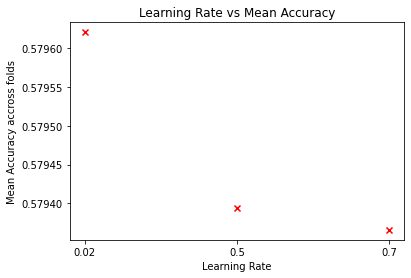

In [78]:
# Plotting model's performance to different learning rates
plt.title('Learning Rate vs Mean Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy accross folds')
x = [ "0.02", "0.5","0.7" ]
y = [mean_acc_kcv_02LR, mean_acc_kcv, mean_acc_kcv_07LR]
plt.scatter(x,y, marker='x',color="red")

We can see that the in our case, the model's perfomance is decreasing as we increase the learning rate. 

In [59]:
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 600 STEPS
kfold = KFold(4, True, 0)
step_sizes = [.5]
steps = 600
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_600steps = [np.mean(acc) for acc in accuracies]
mean_acc_kcv_600steps

Step size: 0.5 where W: [[ 0.24587211  0.39102806 -0.63690016]
 [-0.6074297   0.64142442 -0.03399472]] b: [[ 0.04264565  0.12342717 -0.16607282]] , has loss: 0.9148228107405382 & accuracy: 0.65
Step size: 0.5 where W: [[ 0.26871171  0.28386212 -0.55257383]
 [-0.50582306  0.64419865 -0.13837559]] b: [[-0.01484849  0.07149713 -0.05664863]] , has loss: 0.9554466211433961 & accuracy: 0.5222222222222223
Step size: 0.5 where W: [[ 0.33025564  0.29362317 -0.62387881]
 [-0.60199937  0.63937058 -0.03737121]] b: [[ 0.05777016  0.04393041 -0.10170058]] , has loss: 0.9260739733425565 & accuracy: 0.55
Step size: 0.5 where W: [[ 0.34950032  0.26717881 -0.61667913]
 [-0.48991716  0.61166914 -0.12175198]] b: [[-0.16187786  0.01328785  0.14859002]] , has loss: 0.939495147060428 & accuracy: 0.5944444444444444


[0.5792777777777778]

In [62]:
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 50 STEPS
kfold = KFold(4, True, 0)
reg = 0.1
step_sizes = [.5]
steps = 50
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_50steps = [np.mean(acc) for acc in accuracies]
mean_acc_kcv_50steps

0.1

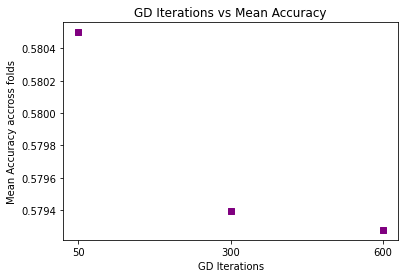

In [76]:
# Plotting model's performance to different gradient descent iterations
plt.title('GD Iterations vs Mean Accuracy')
plt.xlabel('GD Iterations')
plt.ylabel('Mean Accuracy accross folds')
x = [ "50", "300","600" ]
y = [mean_acc_kcv_50steps, mean_acc_kcv, mean_acc_kcv_600steps]
plt.scatter(x,y, marker='s',color="purple")

The number or gradient descent iterations decreseas the mean accuracy accross folds.

-  What is the sensitivity of the model's performance to different regularization parameter values. Find the best regularization parameter using an exhaustive search procedure. Describe your choice via suitable plots. What is the performance difference between using regularization and no regularization?
 

In [65]:
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS Reg= 0.1 --- mean_acc_kcv
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS Reg= 0.3 --- 
kfold = KFold(4, True, 0)
reg = 0.3
step_sizes = [.5]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_reg03 = [np.mean(acc) for acc in accuracies]
mean_acc_kcv_reg03

Step size: 0.5 where W: [[ 0.0960158   0.18215602 -0.27817182]
 [-0.25997571  0.28101329 -0.02103758]] b: [[ 0.03862572  0.12068627 -0.15931198]] , has loss: 1.0045572733791295 & accuracy: 0.5944444444444444
Step size: 0.5 where W: [[ 0.10926696  0.13013313 -0.23940009]
 [-0.20995925  0.27406843 -0.06410917]] b: [[-0.02683056  0.07024566 -0.0434151 ]] , has loss: 1.0293679206657427 & accuracy: 0.5777777777777777
Step size: 0.5 where W: [[ 0.13821022  0.12977394 -0.26798417]
 [-0.26002259  0.27828069 -0.0182581 ]] b: [[ 0.06268461  0.03985582 -0.10254043]] , has loss: 1.0132705252266276 & accuracy: 0.5777777777777777
Step size: 0.5 where W: [[ 0.14826486  0.12459554 -0.2728604 ]
 [-0.19759546  0.25525758 -0.05766212]] b: [[-0.16746048  0.00306965  0.16439082]] , has loss: 1.0169186670225117 & accuracy: 0.5277777777777778


[0.5699907407407406]

In [63]:
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS Reg= 0.5 --- 
kfold = KFold(4, True, 0)
reg = 0.5
step_sizes = [.5]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_reg05 = [np.mean(acc) for acc in accuracies]
mean_acc_kcv_reg05

Step size: 0.5 where W: [[ 0.05948241  0.11915614 -0.17863854]
 [-0.16590147  0.1807465  -0.01484503]] b: [[ 0.03834483  0.11959222 -0.15793705]] , has loss: 1.034032837255195 & accuracy: 0.5222222222222223
Step size: 0.5 where W: [[ 0.06860498  0.08461069 -0.15321567]
 [-0.13276115  0.17463798 -0.04187683]] b: [[-0.02939344  0.06898214 -0.0395887 ]] , has loss: 1.0527218890144916 & accuracy: 0.5555555555555556
Step size: 0.5 where W: [[ 0.08760725  0.08348055 -0.1710878 ]
 [-0.16636517  0.1784608  -0.01209563]] b: [[ 0.06419636  0.03846356 -0.10265992]] , has loss: 1.0413863516609136 & accuracy: 0.5444444444444444
Step size: 0.5 where W: [[ 0.09441918  0.08135329 -0.17577248]
 [-0.12392279  0.16169282 -0.03777002]] b: [[-0.16921728 -0.00017274  0.16939002]] , has loss: 1.0413733729389882 & accuracy: 0.49444444444444446


[0.5301064814814814]

In [64]:
####USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS Reg= 0.5 --- 
kfold = KFold(4, True, 0)
reg = 0.7
step_sizes = [0.5]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv_reg07 = [np.mean(acc) for acc in accuracies]
mean_acc_kcv_reg07

Step size: 0.5 where W: [[ 0.04306369  0.08856107 -0.13162476]
 [-0.12186293  0.13328402 -0.01142109]] b: [[ 0.03839275  0.11897562 -0.15736836]] , has loss: 1.0486890926808141 & accuracy: 0.5055555555555555
Step size: 0.5 where W: [[ 0.0500005   0.0626918  -0.1126923 ]
 [-0.09709295  0.1281931  -0.03110015]] b: [[-0.03044903  0.068236   -0.03778697]] , has loss: 1.0641599572877933 & accuracy: 0.5333333333333333
Step size: 0.5 where W: [[ 0.06414699  0.06154329 -0.12569028]
 [-0.12235265  0.13139472 -0.00904207]] b: [[ 0.06494915  0.03774268 -0.10269183]] , has loss: 1.0552468492131204 & accuracy: 0.5333333333333333
Step size: 0.5 where W: [[ 0.06929574  0.06039372 -0.12968945]
 [-0.09027809  0.11835483 -0.02807674]] b: [[-0.17001768 -0.00177861  0.17179629]] , has loss: 1.0533598577850845 & accuracy: 0.45555555555555555


[0.5072222222222222]

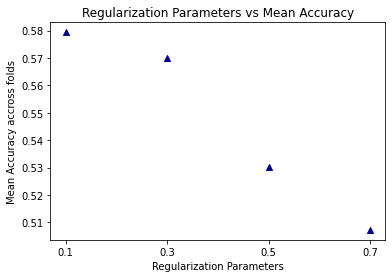

In [79]:
# Plotting model's performance to different gradient descent iterations
plt.title('Regularization Parameters vs Mean Accuracy')
plt.xlabel('Regularization Parameters')
plt.ylabel('Mean Accuracy accross folds')
x = [ "0.1", "0.3","0.5", "0.7"]
y = [mean_acc_kcv, mean_acc_kcv_reg03 , mean_acc_kcv_reg05 , mean_acc_kcv_reg07]
plt.scatter(x,y, marker='^', color="darkblue")

From the plot above, we can observe that as the value of the regularization parameter increases, the mean accuracy accross all folds decreases. Our recommended regularization parameter is 0.1

-  What is the sensitivity of the model's performance with respect to a different test train split (e.g., 50\%:50\%).

In [81]:
#USING 4-FOLD CROSS VALIDATION W/ LR=0.5 & 300 STEPS
X = pickle.load(open('dataX.pickle','rb'))  #'rb' : reading binary
y = pickle.load(open('dataY.pickle','rb')) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

from sklearn.model_selection import KFold
kfold = KFold(4, True, 0)
step_sizes = [.5]
steps = 300
losses = []
accuracies = []
Ws = []
bs = []
for step_size in step_sizes:
    loss_cv = []
    acc_cv =[]
    W_cv = []
    b_cv = []
    for (X_train_i, X_val_i), (y_train_i, y_val_i)  in zip(kfold.split(X_train),kfold.split(y_train)):
        Xtrain = X_train[X_train_i]
        Xval = X_train[X_val_i]
        ytrain = y_train[y_train_i]
        yval = y_train[y_val_i]
        # gradient descent loop
        for i in range(steps):
              num_examples = Xtrain.shape[0]
              #evaluate class scores
              scores = np.dot(Xtrain, W) + b 
              # compute the class probabilities
              exp_scores = np.exp(scores)
              probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
              # compute the loss: average cross-entropy loss 
              corect_logprobs = -np.log(probs[range(num_examples),ytrain])
              data_loss = np.sum(corect_logprobs)/num_examples
              # L2 regularization term
              L2_reg = L2 * np.sum(np.square(W))  #λ sigma w^2
              reg_loss = L2_reg
              loss = data_loss + reg_loss
              # compute the gradient on scores
              dscores = probs
              dscores[range(num_examples),ytrain] -= 1
              dscores /= num_examples
              # backpropate the gradient to the parameters (W,b)
              dW = np.dot(Xtrain.T, dscores)
              db = np.sum(dscores, axis=0, keepdims=True)
              # regularization gradient
              dW += reg*W 
              # perform a parameter update
              W += -step_size * dW
              b += -step_size * db
              # CV Accuracy
              scores = np.dot(Xtrain, W) + b
              predicted_class = np.argmax(scores, axis=1)
              acc = np.mean(predicted_class == ytrain)

              W_cv.append(W)
              b_cv.append(b)
              loss_cv.append(loss)
              acc_cv.append(acc)
        print('Step size:', step_size, 'where W:', W ,'b:',b,', has loss:',loss,'& accuracy:',acc)
    Ws.append(W_cv)
    bs.append(b_cv)
    losses.append(loss_cv)
    accuracies.append(acc_cv)

#Mean accuracy across folds
mean_acc_kcv = [np.mean(acc) for acc in accuracies]
print("accross folds mean accuracy:")
mean_acc_kcv

Step size: 0.5 where W: [[ 0.15141554  0.08404735 -0.23546289]
 [-0.1775584   0.20485286 -0.02729447]] b: [[-0.00189914 -0.25280661  0.25470576]] , has loss: 1.0228453262263248 & accuracy: 0.42857142857142855
Step size: 0.5 where W: [[ 0.13428314  0.14594143 -0.28022457]
 [-0.23831171  0.25226221 -0.0139505 ]] b: [[-0.00405202 -0.04584511  0.04989713]] , has loss: 1.019199514459797 & accuracy: 0.5535714285714286
Step size: 0.5 where W: [[ 0.1501907   0.110886   -0.2610767 ]
 [-0.22172898  0.27051123 -0.04878225]] b: [[ 0.06164711 -0.11825968  0.05661257]] , has loss: 1.020822450780285 & accuracy: 0.5486725663716814
Step size: 0.5 where W: [[ 0.14406603  0.12798785 -0.27205389]
 [-0.20217512  0.21568189 -0.01350677]] b: [[-0.00867898 -0.12092422  0.1296032 ]] , has loss: 1.0279383101021171 & accuracy: 0.5752212389380531
accross folds mean accuracy:


[0.5269560550990308]

We can see that as the training set size decreases, the accuracy of our model also decreases. With the 80/20 train/test split, we got an accuracy of 0.57025 and with the 50/50 train/test split the mean accuracy was  0.5269. 

### 5. Feedforward Neural Networks (2.5pt)

Consider two models: 

(a) a 2-layer feedforward neural network (i.e., 1 hidden layer with $f(x,W_1,b_1,W_2,b_2) = W_2\max(0,W_1x+b_1) + b_2$), and 

(b) same as before but with leaky ReLU ($f(x) = x$ if  $x > 0$, else $ f(x) = 0.01*x$).



 -  Build the above classifiers using _Keras_ and _Tensorflow_ and solve the classification problem for [MNIST/Fashion MNIST](https://www.tensorflow.org/tutorials/keras/basic_classification). 
 
The Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

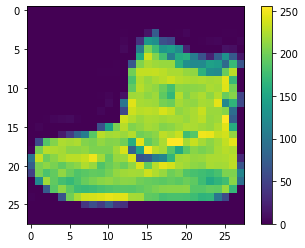

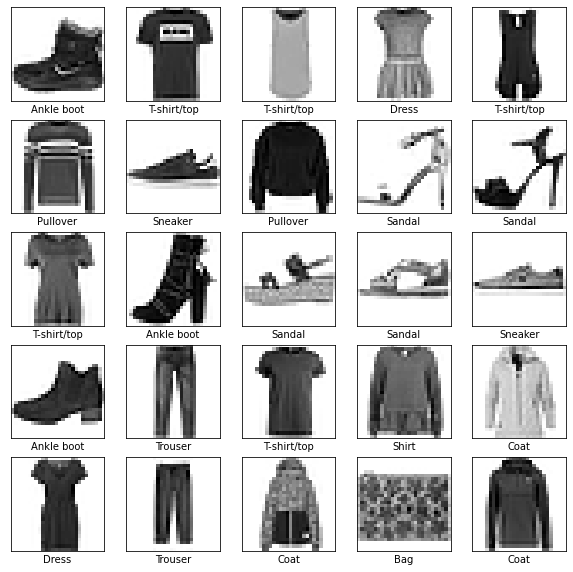

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ----------- LOADING DATA -------------
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#class names are not included with the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#60,000 images in the training set -  each image represented as 28 x 28 pixels
train_images.shape 
#60,000 labels in the training set
len(train_labels)
train_labels      #Each label is an integer between 0 and 9

#10,000 images in the test set - each image is represented as 28 x 28 pixels
test_images.shape
#10,000 images labels
len(test_labels)

#------------ PRE-PROCESS DATA -------------
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#pixel values range from 0 to 255

#Scale these values to range from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Model 1:**

2-layer feedforward neural network with ReLU activation function

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6315 - accuracy: 0.7825
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3895 - accuracy: 0.8602
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3185 - accuracy: 0.8816
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9038
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9088
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9093
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

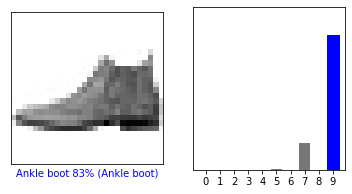

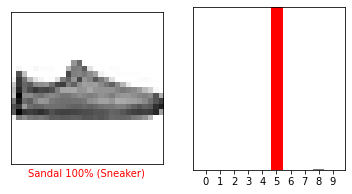

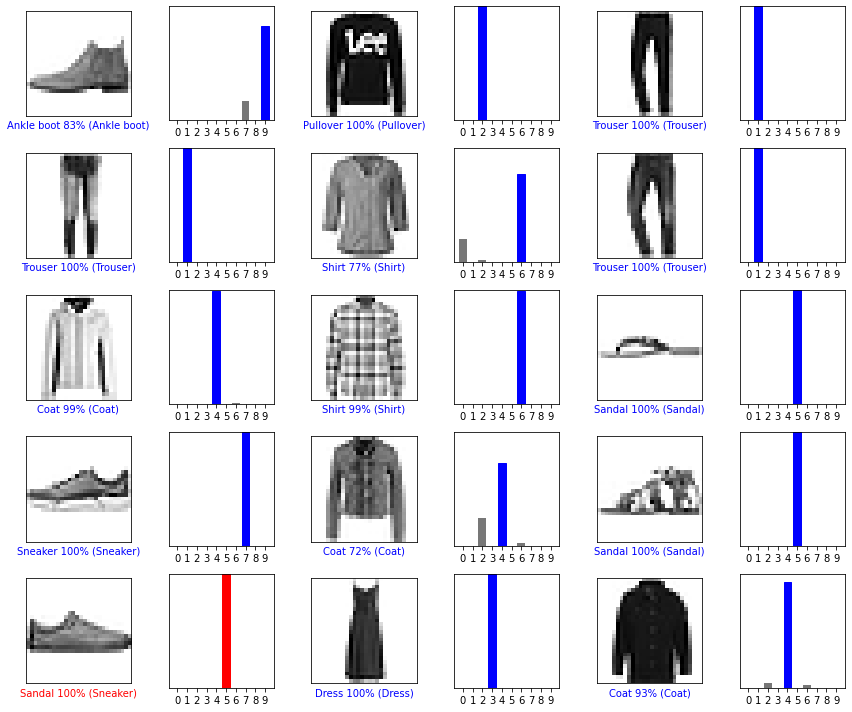

(28, 28)
(1, 28, 28)
[[5.2043524e-06 2.0408588e-15 9.9972087e-01 3.8958237e-14 2.6277840e-04
  3.3463475e-12 1.1104355e-05 1.8219838e-14 3.9468551e-10 2.6749836e-15]]


'Pullover'

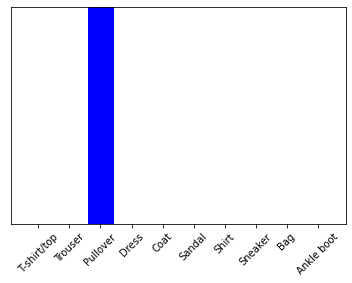

In [129]:
#---------- BUILD MODEL 1: ReLU---------

#Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
    tf.keras.layers.Dense(128, activation='relu'),  #Dense layer with 128 nodes (or neurons)
    tf.keras.layers.Dense(10)                       #last layer returns a logits array with length of 10.
])

#Compile the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Train Model
model.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss1, test_acc1 = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc1)

#Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)  #predicted the label for each image in the testing set
predictions[0]  
np.argmax(predictions[0]) #label that has the highest confidence value
class_names[9]            #the model is most confident that this image is an ankle boot
test_labels[0]            #Examining the test label shows that this classification is correct 


## ------------- Verify Predictions --------
#To look at the full set of 10 class predictions:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#use the trained model to make a prediction about a single image
img = test_images[1] # Grab an image from the test dataset.
print(img.shape)

# Add the image to a batch where it's the only member. 
img = (np.expand_dims(img,0))
print(img.shape)

#predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])
class_names[2]


**Model 2:** 

2-layer feedforward neural network with LEAKY ReLU activation function ($f(x) = x$ if  $x > 0$, else $ f(x) = 0.01*x$).

In [111]:
#---------- BUILD MODEL 2: leaky ReLU---------
#Set up the layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),  #leaky relu activation -- Dense layer with 128 nodes (or neurons)
    tf.keras.layers.Dense(10)                       #last layer returns a logits array with length of 10.
])

#Compile the model
model_2.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ Adam optimizer:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6211 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2869 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2633 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2523 - accuracy: 0.9067
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

9

**-  Discuss how optimizer choice influences performance.**



Model 1 with different optimizers:

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4632 - accuracy: 0.8401
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4481 - accuracy: 0.8439
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4362 - accuracy: 0.8494
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4261 - accuracy: 0.8557
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4183 - accuracy: 0.8550
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4043 - accuracy: 0.8594
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4063 - accuracy: 0.8596
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3979 - accuracy: 0.8617
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3922 - accuracy: 0.8642
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.387

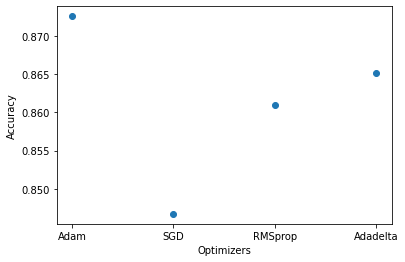

In [123]:
# ---- USING SGD OPTIMIZER-----
#Compile the model
model.compile(optimizer='SGD',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_SGD1, test_acc_SGD1 = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ SGD optimizer:', test_acc_SGD1)

# ---- USING RMSprop OPTIMIZER-----
#Compile the model
model.compile(optimizer='RMSprop',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_RMS1, test_acc_RMS1 = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ RMSprop optimizer:', test_acc_RMS1)

# ---- USING Adadelta OPTIMIZER-----
#Compile the model
model.compile(optimizer='Adadelta',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_Adadelta1, test_acc_Adadelta1 = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ Adadelta optimizer:', test_acc_Adadelta1)

#Plot accuracies
x = ["Adam", "SGD","RMSprop" , "Adadelta"]
y = [test_acc1, test_acc_SGD1, test_acc_RMS1, test_acc_Adadelta1]
plt.scatter(x, y)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.show()

From the above graph, we can see that the optimizer that yields the best accuracy for model 1 is SGD with 0.8949 accuracy

Model 2 with different optimizers: 

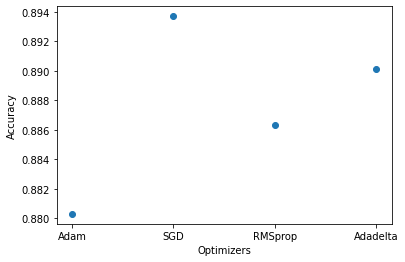

In [125]:
# ---- USING SGD OPTIMIZER-----
#Compile the model
model_2.compile(optimizer='SGD',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_SGD, test_acc_SGD = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ SGD optimizer:', test_acc_SGD)

# ---- USING RMSprop OPTIMIZER-----
#Compile the model
model_2.compile(optimizer='RMSprop',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_RMS, test_acc_RMS = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ RMSprop optimizer:', test_acc_RMS)

# ---- USING Adadelta OPTIMIZER-----
#Compile the model
model_2.compile(optimizer='Adadelta',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_Adadelta, test_acc_Adadelta = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ Adadelta optimizer:', test_acc_Adadelta)

#Plot accuracies
x = ["Adam", "SGD","RMSprop" , "Adadelta"]
y = [test_acc, test_acc_SGD, test_acc_RMS, test_acc_Adadelta]
plt.scatter(x, y)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.show()

Again, from the above graph, we can see that the optimizer that yields the best accuracy for model 2 is SGD. 

**-  What happens when the number of hidden units chosen is much smaller. Similarly, what happens when the number of hidden units chosen is much higher?**

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1966 - accuracy: 0.5968
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5694 - accuracy: 0.8053
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5011 - accuracy: 0.8276
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4780 - accuracy: 0.8344
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4566 - accuracy: 0.8418
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8476
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4311 - accuracy: 0.8504
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4301 - accuracy: 0.8507
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4159 - accuracy: 0.8561
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.408

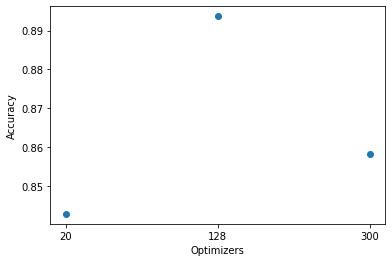

In [126]:
#BEST MODEL == MODEL 2 WITH SGD OPTIMIZER, with different hidden units -- 20 

#Set up the layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
    tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),  #leaky relu activation -- 20 hidden units
    tf.keras.layers.Dense(10)                       #last layer returns a logits array with length of 10.
])

#Compile the model
model_2.compile(optimizer='SGD',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_SGD_20, test_acc_SGD_20 = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ SGD optimizer:', test_acc_SGD_20)

#BEST MODEL == MODEL 2 WITH SGD OPTIMIZER, with different hidden units -- 300 

#Set up the layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
    tf.keras.layers.Dense(300, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),  #leaky relu activation -- 20 hidden units
    tf.keras.layers.Dense(10)                       #last layer returns a logits array with length of 10.
])

#Compile the model
model_2.compile(optimizer='SGD',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train Model
model_2.fit(train_images, train_labels, epochs=10)
#Test Model
test_loss_SGD_300, test_acc_SGD_300 = model_2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy w/ SGD optimizer :', test_acc_SGD_300)


#Plot accuracies
x = ["20", "128","300"]
y = [test_acc_SGD_20, test_acc_SGD, test_acc_SGD_300]
plt.scatter(x, y)
plt.xlabel("Hidden Units")
plt.ylabel("Accuracy")
plt.show()



When we change the number of hidden units, the test accuracy also changes. In our case, the best model model had 128 hidden units and used the SGD optimizer.  It is interesting to see that the model with 300 hiden units decreased the accuracy of the model, we might be overfitting. 